# TODO

- Out

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor


In [3]:
df = pd.read_csv("/content/train.csv")

In [4]:
df.head()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073


In [5]:
df.isna().sum()

,0
Component1_fraction,0
Component2_fraction,0
Component3_fraction,0
Component4_fraction,0
Component5_fraction,0
...,...
BlendProperty6,1
BlendProperty7,1
BlendProperty8,1
BlendProperty9,1


In [6]:
# Checking for duplicates

df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(887, 65)

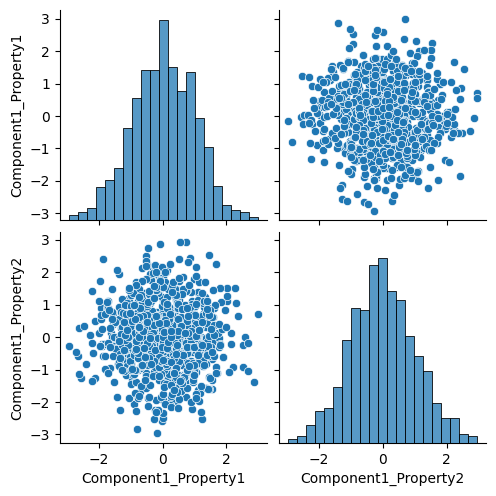

In [8]:
sns.pairplot(df, vars=["Component1_Property1","Component1_Property2"])
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

# Load data
train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")

# Features and targets
X = train.iloc[:, :55]  # First 55 columns: blend composition + component properties
y = train.iloc[:, 55:]  # Last 10 columns: target properties

# Train-test split (for validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: MultiOutput + XGBoost
model = MultiOutputRegressor(XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, random_state=42))
model.fit(X_train, y_train)

# Predict on validation
val_preds = model.predict(X_val)
mape = mean_absolute_percentage_error(y_val, val_preds)
print(f"Validation MAPE: {mape:.4f}")


In [61]:
# from sklearn.model_selection import KFold

# # Load data
# train = pd.read_csv("train.csv")
# # test = pd.read_csv("test.csv")

# # Features and targets

# X = train.iloc[:, :55]  # First 55 columns: blend composition + component properties
# y = train.iloc[:, 55:]  # Last 10 columns: target properties

# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# val_mape_list = []

# # Train-test split (for validation)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# for train_index, val_index in kf.split(X):
#     X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
#     y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

#     model = MultiOutputRegressor(XGBRegressor(
#         n_estimators=300, learning_rate=0.001, max_depth=16, subsample=0.9, random_state=42))

#     model.fit(X_train_fold, y_train_fold)
#     preds = model.predict(X_val_fold)
#     fold_mape = mean_absolute_percentage_error(y_val_fold, preds)
#     val_mape_list.append(fold_mape)

# print("CV MAPE:", np.mean(val_mape_list))


# Day - 2

In [62]:
def apply_xgb_to_properties(df, test_size=0.2, random_state=42):
    """
    Apply XGBRegressor to each of the 10 properties using component fractions and corresponding property values.

    Parameters:
    df (DataFrame): The input dataframe containing all features and targets
    test_size (float): Proportion of dataset to include in the test split
    random_state (int): Random state for reproducibility

    Returns:
    dict: Dictionary containing models, predictions, and MAPE scores for each property
    """

    # Define component fractions (features that are common for all properties)
    component_fractions = [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction',
        'Component4_fraction', 'Component5_fraction'
    ]

    # Define the 10 properties
    properties = [
        'Property1', 'Property2', 'Property3', 'Property4', 'Property5',
        'Property6', 'Property7', 'Property8', 'Property9', 'Property10'
    ]

    results = {}

    for prop in properties:
        print(f"\nTraining XGBRegressor for {prop}...")

        # Define features for this property: component fractions + all component property values
        property_features = [
            f'Component1_{prop}', f'Component2_{prop}', f'Component3_{prop}',
            f'Component4_{prop}', f'Component5_{prop}'
        ]

        # Combine features: component fractions + property values
        features = component_fractions + property_features

        # Define target: BlendProperty corresponding to this property
        target = f'Blend{prop}'

        # Extract features and target
        X = df[features]
        y = df[target]
        # NEW SHIIII
        # Drop rows with NaN values in the target variable
        nan_mask = y.isna()
        if nan_mask.any():
            print(f"  Dropping {nan_mask.sum()} rows with NaN values in the target '{target}'")
            X = X[~nan_mask]
            y = y[~nan_mask]



        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # Train XGBRegressor
        model = XGBRegressor(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            random_state=random_state,
            verbosity=0  # Suppress XGBoost output
        )

        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate MAPE
        mape = mean_absolute_percentage_error(y_test, y_pred)

        # Store results
        results[prop] = {
            'model': model,
            'features': features,
            'target': target,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'y_pred': y_pred,
            'mape': mape
        }

        print(f"  Features used: {len(features)} ({', '.join(features)})")
        print(f"  Target: {target}")
        print(f"  Training samples: {len(X_train)}")
        print(f"  Test samples: {len(X_test)}")
        print(f"  MAPE: {mape:.4f}")

    return results


    # Apply XGBRegressor to all 10 properties
results = apply_xgb_to_properties(df)

# Display summary of results
print("\n" + "="*60)
print("SUMMARY OF RESULTS")
print("="*60)

for prop, result in results.items():
    print(f"{prop:12} | MAPE: {result['mape']:.4f} | Features: {len(result['features'])}")

# Find best and worst performing properties
best_prop = min(results.keys(), key=lambda x: results[x]['mape'])
worst_prop = max(results.keys(), key=lambda x: results[x]['mape'])

print(f"\nBest performing property: {best_prop} (MAPE: {results[best_prop]['mape']:.4f})")
print(f"Worst performing property: {worst_prop} (MAPE: {results[worst_prop]['mape']:.4f})")
print(f"Average MAPE across all properties: {np.mean([r['mape'] for r in results.values()]):.4f}")


Training XGBRegressor for Property1...
  Features used: 10 (Component1_fraction, Component2_fraction, Component3_fraction, Component4_fraction, Component5_fraction, Component1_Property1, Component2_Property1, Component3_Property1, Component4_Property1, Component5_Property1)
  Target: BlendProperty1
  Training samples: 1600
  Test samples: 400
  MAPE: 1.3320

Training XGBRegressor for Property2...
  Features used: 10 (Component1_fraction, Component2_fraction, Component3_fraction, Component4_fraction, Component5_fraction, Component1_Property2, Component2_Property2, Component3_Property2, Component4_Property2, Component5_Property2)
  Target: BlendProperty2
  Training samples: 1600
  Test samples: 400
  MAPE: 1.3068

Training XGBRegressor for Property3...
  Features used: 10 (Component1_fraction, Component2_fraction, Component3_fraction, Component4_fraction, Component5_fraction, Component1_Property3, Component2_Property3, Component3_Property3, Component4_Property3, Component5_Property3)
  

In [63]:
from sklearn.ensemble import RandomForestRegressor


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

def apply_rf_to_properties(df, test_size=0.2, random_state=42):
    """
    Apply RandomForestRegressor to each of the 10 properties using component fractions and corresponding property values.

    Parameters:
    df (DataFrame): The input dataframe containing all features and targets
    test_size (float): Proportion of dataset to include in the test split
    random_state (int): Random state for reproducibility

    Returns:
    dict: Dictionary containing models, predictions, and MAPE scores for each property
    """

    # Define component fractions (features that are common for all properties)
    component_fractions = [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction',
        'Component4_fraction', 'Component5_fraction'
    ]

    # Define the 10 properties
    properties = [
        'Property1', 'Property2', 'Property3', 'Property4', 'Property5',
        'Property6', 'Property7', 'Property8', 'Property9', 'Property10'
    ]

    results = {}

    for prop in properties:
        print(f"\nTraining RandomForestRegressor for {prop}...")

        # Define features for this property
        property_features = [
            f'Component1_{prop}', f'Component2_{prop}', f'Component3_{prop}',
            f'Component4_{prop}', f'Component5_{prop}'
        ]

        features = component_fractions + property_features
        target = f'Blend{prop}'

        # Extract features and target
        X = df[features]
        y = df[target]

        # Drop invalid values
        valid_mask = (~y.isna()) & np.isfinite(y)
        X = X[valid_mask].replace([np.inf, -np.inf], np.nan).dropna()
        y = y.loc[X.index]

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # Train RandomForestRegressor
        model = RandomForestRegressor(
            n_estimators=100,
            max_depth=10,
            random_state=random_state,
            n_jobs=-1
        )

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        results[prop] = {
            'model': model,
            'features': features,
            'target': target,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'y_pred': y_pred,
            'mape': mape
        }

        print(f"  Features used: {len(features)} ({', '.join(features)})")
        print(f"  Target: {target}")
        print(f"  Training samples: {len(X_train)}")
        print(f"  Test samples: {len(X_test)}")
        print(f"  MAPE: {mape:.4f}")

    return results

# Apply RandomForestRegressor to all 10 properties
results = apply_rf_to_properties(df)

# Display summary of results
print("\n" + "="*60)
print("SUMMARY OF RESULTS")
print("="*60)

for prop, result in results.items():
    print(f"{prop:12} | MAPE: {result['mape']:.4f} | Features: {len(result['features'])}")

# Best and worst
best_prop = min(results.keys(), key=lambda x: results[x]['mape'])
worst_prop = max(results.keys(), key=lambda x: results[x]['mape'])

print(f"\nBest performing property: {best_prop} (MAPE: {results[best_prop]['mape']:.4f})")
print(f"Worst performing property: {worst_prop} (MAPE: {results[worst_prop]['mape']:.4f})")
print(f"Average MAPE across all properties: {np.mean([r['mape'] for r in results.values()]):.4f}")



Training RandomForestRegressor for Property1...
  Features used: 10 (Component1_fraction, Component2_fraction, Component3_fraction, Component4_fraction, Component5_fraction, Component1_Property1, Component2_Property1, Component3_Property1, Component4_Property1, Component5_Property1)
  Target: BlendProperty1
  Training samples: 1600
  Test samples: 400
  MAPE: 23.4980

Training RandomForestRegressor for Property2...
  Features used: 10 (Component1_fraction, Component2_fraction, Component3_fraction, Component4_fraction, Component5_fraction, Component1_Property2, Component2_Property2, Component3_Property2, Component4_Property2, Component5_Property2)
  Target: BlendProperty2
  Training samples: 1600
  Test samples: 400
  MAPE: 1.5892

Training RandomForestRegressor for Property3...
  Features used: 10 (Component1_fraction, Component2_fraction, Component3_fraction, Component4_fraction, Component5_fraction, Component1_Property3, Component2_Property3, Component3_Property3, Component4_Propert

In [65]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

def apply_hgb_to_properties(df, test_size=0.2, random_state=42):
    """
    Apply HistGradientBoostingRegressor to each of the 10 properties using component fractions and corresponding property values.

    Parameters:
    df (DataFrame): The input dataframe containing all features and targets
    test_size (float): Proportion of dataset to include in the test split
    random_state (int): Random state for reproducibility

    Returns:
    dict: Dictionary containing models, predictions, and MAPE scores for each property
    """

    # Define component fractions
    component_fractions = [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction',
        'Component4_fraction', 'Component5_fraction'
    ]

    # Define the 10 properties
    properties = [
        'Property1', 'Property2', 'Property3', 'Property4', 'Property5',
        'Property6', 'Property7', 'Property8', 'Property9', 'Property10'
    ]

    results = {}

    for prop in properties:
        print(f"\nTraining HistGradientBoostingRegressor for {prop}...")

        # Define features
        property_features = [
            f'Component1_{prop}', f'Component2_{prop}', f'Component3_{prop}',
            f'Component4_{prop}', f'Component5_{prop}'
        ]

        features = component_fractions + property_features
        target = f'Blend{prop}'

        # Extract and clean
        X = df[features]
        y = df[target]
        valid_mask = (~y.isna()) & np.isfinite(y)
        X = X[valid_mask].replace([np.inf, -np.inf], np.nan).dropna()
        y = y.loc[X.index]

        # Split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # Model
        model = HistGradientBoostingRegressor(
            learning_rate=0.05,
            max_iter=200,
            max_depth=6,
            random_state=random_state
        )

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        results[prop] = {
            'model': model,
            'features': features,
            'target': target,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'y_pred': y_pred,
            'mape': mape
        }

        print(f"  Features used: {len(features)} ({', '.join(features)})")
        print(f"  Target: {target}")
        print(f"  Training samples: {len(X_train)}")
        print(f"  Test samples: {len(X_test)}")
        print(f"  MAPE: {mape:.4f}")

    return results

# Run the model
results = apply_hgb_to_properties(df)

# Summary
print("\n" + "="*60)
print("SUMMARY OF RESULTS")
print("="*60)

for prop, result in results.items():
    print(f"{prop:12} | MAPE: {result['mape']:.4f} | Features: {len(result['features'])}")

best_prop = min(results.keys(), key=lambda x: results[x]['mape'])
worst_prop = max(results.keys(), key=lambda x: results[x]['mape'])

print(f"\nBest performing property: {best_prop} (MAPE: {results[best_prop]['mape']:.4f})")
print(f"Worst performing property: {worst_prop} (MAPE: {results[worst_prop]['mape']:.4f})")
print(f"Average MAPE across all properties: {np.mean([r['mape'] for r in results.values()]):.4f}")



Training HistGradientBoostingRegressor for Property1...
  Features used: 10 (Component1_fraction, Component2_fraction, Component3_fraction, Component4_fraction, Component5_fraction, Component1_Property1, Component2_Property1, Component3_Property1, Component4_Property1, Component5_Property1)
  Target: BlendProperty1
  Training samples: 1600
  Test samples: 400
  MAPE: 4.9801

Training HistGradientBoostingRegressor for Property2...
  Features used: 10 (Component1_fraction, Component2_fraction, Component3_fraction, Component4_fraction, Component5_fraction, Component1_Property2, Component2_Property2, Component3_Property2, Component4_Property2, Component5_Property2)
  Target: BlendProperty2
  Training samples: 1600
  Test samples: 400
  MAPE: 1.5287

Training HistGradientBoostingRegressor for Property3...
  Features used: 10 (Component1_fraction, Component2_fraction, Component3_fraction, Component4_fraction, Component5_fraction, Component1_Property3, Component2_Property3, Component3_Proper

In [66]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

def apply_lgbm_to_properties(df, test_size=0.2, random_state=42):
    component_fractions = [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction',
        'Component4_fraction', 'Component5_fraction'
    ]
    properties = [f'Property{i}' for i in range(1, 11)]

    results = {}
    for prop in properties:
        print(f"\nTraining LGBMRegressor for {prop}...")

        property_features = [f'Component{i}_{prop}' for i in range(1, 6)]
        features = component_fractions + property_features
        target = f'Blend{prop}'

        X = df[features]
        y = df[target]

        # Clean invalid entries
        mask = (~y.isna()) & np.isfinite(y)
        X = X[mask].replace([np.inf, -np.inf], np.nan).dropna()
        y = y.loc[X.index]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        model = LGBMRegressor(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=6,
            random_state=random_state
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        results[prop] = {
            'model': model, 'features': features, 'target': target,
            'X_train': X_train, 'X_test': X_test,
            'y_train': y_train, 'y_test': y_test, 'y_pred': y_pred,
            'mape': mape
        }
        print(f"  MAPE: {mape:.4f}")

    return results
apply_lgbm_to_properties(df)


Training LGBMRegressor for Property1...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1507
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 10
[LightGBM] [Info] Start training from score -0.007867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

{'Property1': {'model': LGBMRegressor(learning_rate=0.05, max_depth=6, n_estimators=200,
                random_state=42),
  'features': ['Component1_fraction',
   'Component2_fraction',
   'Component3_fraction',
   'Component4_fraction',
   'Component5_fraction',
   'Component1_Property1',
   'Component2_Property1',
   'Component3_Property1',
   'Component4_Property1',
   'Component5_Property1'],
  'target': 'BlendProperty1',
  'X_train':       Component1_fraction  Component2_fraction  Component3_fraction  \
  968                  0.07                 0.11                 0.50   
  240                  0.13                 0.00                 0.48   
  819                  0.02                 0.14                 0.32   
  692                  0.30                 0.04                 0.00   
  420                  0.15                 0.18                 0.00   
  ...                   ...                  ...                  ...   
  1130                 0.11                 0.1

In [67]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

def apply_catboost_to_properties(df, test_size=0.2, random_state=42):
    component_fractions = [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction',
        'Component4_fraction', 'Component5_fraction'
    ]
    properties = [f'Property{i}' for i in range(1, 11)]

    results = {}
    for prop in properties:
        print(f"\nTraining CatBoostRegressor for {prop}...")

        property_features = [f'Component{i}_{prop}' for i in range(1, 6)]
        features = component_fractions + property_features
        target = f'Blend{prop}'

        X = df[features]
        y = df[target]

        mask = (~y.isna()) & np.isfinite(y)
        X = X[mask].replace([np.inf, -np.inf], np.nan).dropna()
        y = y.loc[X.index]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        model = CatBoostRegressor(
            iterations=200,
            learning_rate=0.05,
            depth=6,
            verbose=0,
            random_state=random_state
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        results[prop] = {
            'model': model, 'features': features, 'target': target,
            'X_train': X_train, 'X_test': X_test,
            'y_train': y_train, 'y_test': y_test, 'y_pred': y_pred,
            'mape': mape
        }
        print(f"  MAPE: {mape:.4f}")

    return results

apply_catboost_to_properties(df)



Training CatBoostRegressor for Property1...
  MAPE: 4.9880

Training CatBoostRegressor for Property2...
  MAPE: 0.9385

Training CatBoostRegressor for Property3...
  MAPE: 2.2329

Training CatBoostRegressor for Property4...
  MAPE: 0.5562

Training CatBoostRegressor for Property5...
  MAPE: 0.2578

Training CatBoostRegressor for Property6...
  MAPE: 1.2434

Training CatBoostRegressor for Property7...
  MAPE: 1.0950

Training CatBoostRegressor for Property8...
  MAPE: 3.7082

Training CatBoostRegressor for Property9...
  MAPE: 1.7643

Training CatBoostRegressor for Property10...
  MAPE: 0.4037


{'Property1': {'model': <catboost.core.CatBoostRegressor at 0x7ca78d3e6690>,
  'features': ['Component1_fraction',
   'Component2_fraction',
   'Component3_fraction',
   'Component4_fraction',
   'Component5_fraction',
   'Component1_Property1',
   'Component2_Property1',
   'Component3_Property1',
   'Component4_Property1',
   'Component5_Property1'],
  'target': 'BlendProperty1',
  'X_train':       Component1_fraction  Component2_fraction  Component3_fraction  \
  968                  0.07                 0.11                 0.50   
  240                  0.13                 0.00                 0.48   
  819                  0.02                 0.14                 0.32   
  692                  0.30                 0.04                 0.00   
  420                  0.15                 0.18                 0.00   
  ...                   ...                  ...                  ...   
  1130                 0.11                 0.15                 0.14   
  1294              

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

def apply_nn_to_properties(df, test_size=0.2, random_state=42, verbose=0):
    tf.random.set_seed(random_state)

    component_fractions = [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction',
        'Component4_fraction', 'Component5_fraction'
    ]
    properties = [f'Property{i}' for i in range(1, 11)]

    results = {}

    print("\n" + "="*60)
    print("Training Neural Network for Fuel Blend Property Prediction")
    print("="*60)

    for idx, prop in enumerate(properties, 1):
        print(f"\n[{idx}/10] Training for {prop}...")

        property_features = [f'Component{i}_{prop}' for i in range(1, 6)]
        features = component_fractions + property_features
        target = f'Blend{prop}'

        X = df[features]
        y = df[target]

        mask = (~y.isna()) & np.isfinite(y)
        X = X[mask].replace([np.inf, -np.inf], np.nan).dropna()
        y = y.loc[X.index]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # Build model
        model = Sequential([
            Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(0.2),
            Dense(64, activation='relu'),
            Dense(1)
        ])

        model.compile(optimizer='adam', loss='mae')

        model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=verbose)

        y_pred = model.predict(X_test, verbose=0).flatten()
        mape = mean_absolute_percentage_error(y_test, y_pred)

        results[prop] = {
            'model': model, 'features': features, 'target': target,
            'X_train': X_train, 'X_test': X_test,
            'y_train': y_train, 'y_test': y_test, 'y_pred': y_pred,
            'mape': mape
        }
        print(f"MAPE on test data   : {mape:.4f}")

    # Summary block
    print("\n" + "="*60)
    print("NEURAL NETWORK MODEL SUMMARY")
    print("="*60)

    total_mape = 0
    for prop, res in results.items():
        print(f"{prop:12} | MAPE: {res['mape']:.4f}")
        total_mape += res['mape']

    avg_mape = total_mape / len(results)
    print("-" * 60)
    print(f"Average MAPE across all properties: {avg_mape:.4f}")
    print("="*60)

    return results

# Call the function (set verbose=1 if you want per-epoch logs)
nn_results = apply_nn_to_properties(df, verbose=0)



Training Neural Network for Fuel Blend Property Prediction

[1/10] Training for Property1...
MAPE on test data   : 1.7088

[2/10] Training for Property2...
MAPE on test data   : 0.3614

[3/10] Training for Property3...
MAPE on test data   : 2.4930

[4/10] Training for Property4...
MAPE on test data   : 0.3281

[5/10] Training for Property5...
MAPE on test data   : 0.4212

[6/10] Training for Property6...
MAPE on test data   : 0.5644

[7/10] Training for Property7...
MAPE on test data   : 1.0351

[8/10] Training for Property8...


KeyboardInterrupt: 

In [69]:
def apply_mixed_models_to_properties(df, test_size=0.2, random_state=42):
    """
    Apply different models to different properties based on optimal performance:
    - Properties 1, 2, 4, 6, 9, 10: Neural Network
    - Properties 3, 5: Random Forest
    - Properties 7, 8: HistGradientBoostingRegressor
    """

    # Property to model mapping
    model_mapping = {
        'Property1': 'nn', 'Property2': 'nn', 'Property3': 'rf', 'Property4': 'nn', 'Property5': 'rf',
        'Property6': 'nn', 'Property7': 'hgb', 'Property8': 'hgb', 'Property9': 'nn', 'Property10': 'nn'
    }

    print("="*80)
    print("MIXED MODEL APPROACH FOR FUEL BLEND PROPERTY PREDICTION")
    print("="*80)
    print("Model Assignment:")
    for prop, model_type in model_mapping.items():
        model_name = {'nn': 'Neural Network', 'rf': 'Random Forest', 'hgb': 'HistGradientBoosting'}[model_type]
        print(f"  {prop}: {model_name}")
    print("="*80)

    component_fractions = [
        'Component1_fraction', 'Component2_fraction', 'Component3_fraction',
        'Component4_fraction', 'Component5_fraction'
    ]

    results = {}

    for prop, model_type in model_mapping.items():
        print(f"\nTraining {model_type.upper()} for {prop}...")

        # Prepare features and target
        property_features = [f'Component{i}_{prop}' for i in range(1, 6)]
        features = component_fractions + property_features
        target = f'Blend{prop}'

        X = df[features]
        y = df[target]

        # Clean data
        mask = (~y.isna()) & np.isfinite(y)
        X = X[mask].replace([np.inf, -np.inf], np.nan).dropna()
        y = y.loc[X.index]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # Train based on model type
        if model_type == 'nn':
            # Neural Network
            tf.random.set_seed(random_state)
            model = Sequential([
                Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                Dropout(0.2),
                Dense(64, activation='relu'),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mae')
            model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
            y_pred = model.predict(X_test, verbose=0).flatten()

        elif model_type == 'rf':
            # Random Forest
            model = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                random_state=random_state,
                n_jobs=-1
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        elif model_type == 'hgb':
            # HistGradientBoosting
            model = HistGradientBoostingRegressor(
                learning_rate=0.05,
                max_iter=200,
                max_depth=6,
                random_state=random_state
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Calculate MAPE
        mape = mean_absolute_percentage_error(y_test, y_pred)

        results[prop] = {
            'model': model,
            'model_type': model_type,
            'features': features,
            'target': target,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'y_pred': y_pred,
            'mape': mape
        }

        print(f"  Model Type: {model_type.upper()}")
        print(f"  Features: {len(features)}")
        print(f"  Training samples: {len(X_train)}")
        print(f"  Test samples: {len(X_test)}")
        print(f"  MAPE: {mape:.4f}")

    return results

# Run the mixed model approach
mixed_results = apply_mixed_models_to_properties(df)

# Display comprehensive summary
print("\n" + "="*80)
print("MIXED MODEL RESULTS SUMMARY")
print("="*80)

# Group by model type
model_types = {'nn': [], 'rf': [], 'hgb': []}
for prop, result in mixed_results.items():
    model_types[result['model_type']].append((prop, result['mape']))

print("\nResults by Model Type:")
print("-" * 40)

for model_type, properties in model_types.items():
    if properties:
        model_name = {'nn': 'Neural Network', 'rf': 'Random Forest', 'hgb': 'HistGradientBoosting'}[model_type]
        print(f"\n{model_name}:")
        total_mape = 0
        for prop, mape in properties:
            print(f"  {prop:12} | MAPE: {mape:.4f}")
            total_mape += mape
        avg_mape = total_mape / len(properties)
        print(f"  {'Average':<12} | MAPE: {avg_mape:.4f}")

print("\n" + "-" * 80)
print("Overall Performance:")
all_mapes = [result['mape'] for result in mixed_results.values()]
overall_avg = np.mean(all_mapes)
best_prop = min(mixed_results.keys(), key=lambda x: mixed_results[x]['mape'])
worst_prop = max(mixed_results.keys(), key=lambda x: mixed_results[x]['mape'])

print(f"Best performing property : {best_prop} (MAPE: {mixed_results[best_prop]['mape']:.4f}) - {mixed_results[best_prop]['model_type'].upper()}")
print(f"Worst performing property: {worst_prop} (MAPE: {mixed_results[worst_prop]['mape']:.4f}) - {mixed_results[worst_prop]['model_type'].upper()}")
print(f"Overall Average MAPE     : {overall_avg:.4f}")
print("="*80)

MIXED MODEL APPROACH FOR FUEL BLEND PROPERTY PREDICTION
Model Assignment:
  Property1: Neural Network
  Property2: Neural Network
  Property3: Random Forest
  Property4: Neural Network
  Property5: Random Forest
  Property6: Neural Network
  Property7: HistGradientBoosting
  Property8: HistGradientBoosting
  Property9: Neural Network
  Property10: Neural Network

Training NN for Property1...
  Model Type: NN
  Features: 10
  Training samples: 1600
  Test samples: 400
  MAPE: 3.6372

Training NN for Property2...
  Model Type: NN
  Features: 10
  Training samples: 1600
  Test samples: 400
  MAPE: 0.6845

Training RF for Property3...
  Model Type: RF
  Features: 10
  Training samples: 1600
  Test samples: 400
  MAPE: 1.9931

Training NN for Property4...
  Model Type: NN
  Features: 10
  Training samples: 1600
  Test samples: 400
  MAPE: 0.3346

Training RF for Property5...
  Model Type: RF
  Features: 10
  Training samples: 1600
  Test samples: 400
  MAPE: 0.0474

Training NN for Property

In [71]:
test = pd.read_csv("test.csv")

# mixed_results = apply_mixed_models_to_properties(test)


In [74]:
df.head()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073


In [72]:
test.head()

,ID,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,...,Component1_Property9,Component2_Property9,Component3_Property9,Component4_Property9,Component5_Property9,Component1_Property10,Component2_Property10,Component3_Property10,Component4_Property10,Component5_Property10
0,1,0.18,0.05,0.32,0.37,0.08,-0.177804,-0.741219,0.769821,-0.877069,...,-0.265376,0.123432,0.028533,-0.173365,1.297923,0.323299,-0.315146,0.625518,-0.514342,-0.777057
1,2,0.00,0.50,0.00,0.37,0.13,2.501354,0.177344,-0.498739,-0.196742,...,-0.787677,-0.757905,-0.280561,-1.965970,0.543475,-0.906851,0.962341,-0.183757,0.310871,-1.329042
2,3,0.16,0.00,0.17,0.50,0.17,1.547324,0.891479,0.030627,-0.368678,...,-0.710026,-1.422693,0.874071,-1.016144,0.093525,1.048525,-1.321851,0.356640,-0.869543,-0.177255
3,4,0.50,0.00,0.17,0.16,0.17,-0.424427,1.016862,-1.182979,-0.854225,...,-0.551366,0.257105,-0.077337,-0.721031,-0.760365,-0.507690,1.346556,-0.001529,-1.008445,1.726105
4,5,0.00,0.00,0.50,0.50,0.00,-0.187062,-0.762173,-0.473660,2.074087,...,-1.811468,-0.181223,-0.475933,0.234775,-0.909020,1.238203,-1.805664,0.980417,-1.354932,-0.657513


In [76]:
test.shape

(500, 56)

In [73]:
?mixed_results = apply_mixed_models_to_properties(test)


MIXED MODEL APPROACH FOR FUEL BLEND PROPERTY PREDICTION
Model Assignment:
  Property1: Neural Network
  Property2: Neural Network
  Property3: Random Forest
  Property4: Neural Network
  Property5: Random Forest
  Property6: Neural Network
  Property7: HistGradientBoosting
  Property8: HistGradientBoosting
  Property9: Neural Network
  Property10: Neural Network

Training NN for Property1...


KeyError: 'BlendProperty1'

# Droping the First 5 Coloumns


In [9]:
df = df.drop(df.columns[0:5], axis=1)

In [10]:
df.head()



,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,Component1_Property2,Component2_Property2,Component3_Property2,Component4_Property2,Component5_Property2,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,-0.021782,1.981251,0.020036,0.140315,1.032029,-1.229799,-0.580274,0.133998,0.817835,0.216116,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,-0.224339,1.148036,-1.107840,0.149533,-0.354000,-1.075041,0.892835,1.363473,-1.743684,1.273144,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.457763,0.242591,-0.922492,0.908213,0.972003,0.240404,2.210005,-2.652413,-0.593851,-0.678255,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,-0.577734,-0.930826,0.815284,0.447514,0.455717,-0.587815,1.962581,-1.147891,0.268938,0.207318,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.120415,0.666268,-0.626934,2.725357,0.392259,0.127614,-0.177430,-1.517532,0.114478,0.626086,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073


- P1 - NN
- P2 - NN
- P3 - Rand
- P4 - NN
- P5 - Rand
- P6 - NN
- P7 - Grad boost
- P8 - Grad boost
- P9 - NN
- P10 - NN


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np


In [16]:
p1 = df[["Component1_Property1", "Component2_Property1", "Component3_Property1", "Component4_Property1", "Component5_Property1"]]
p1T = df[["BlendProperty1"]]

# Handle NaN values
nan_mask = p1T.isna().any(axis=1)
p1 = p1[~nan_mask]
p1T = p1T[~nan_mask]


X_train, X_test, y_train, y_test = train_test_split(
    p1, p1T, test_size=0.2, random_state=42
)


# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred = model.predict(X_test, verbose=0).flatten()
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2.2909159660339355

In [17]:
p2 = df[["Component1_Property2", "Component2_Property2", "Component3_Property2", "Component4_Property2", "Component5_Property2"]]
p2T = df[["BlendProperty2"]]

nan_mask = p2T.isna().any(axis=1)
p2 = p2[~nan_mask]
p2T = p2T[~nan_mask]

X_train, X_test, y_train, y_test = train_test_split(
    p2, p2T, test_size=0.2, random_state=42
)

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred = model.predict(X_test, verbose=0).flatten()
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1.853065013885498

In [18]:
p3 = df[["Component1_Property3", "Component2_Property3", "Component3_Property3", "Component4_Property3", "Component5_Property3"]]
p3T = df[["BlendProperty3"]]

nan_mask = p3T.isna().any(axis=1)
p3 = p3[~nan_mask]
p3T = p3T[~nan_mask]

X_train, X_test, y_train, y_test = train_test_split(
    p3, p3T, test_size=0.2, random_state=42
)

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred = model.predict(X_test, verbose=0).flatten()
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1.4865858554840088

In [19]:
p4 = df[["Component1_Property4", "Component2_Property4", "Component3_Property4", "Component4_Property4", "Component5_Property4"]]
p4T = df[["BlendProperty4"]]

nan_mask = p4T.isna().any(axis=1)
p4 = p4[~nan_mask]
p4T = p4T[~nan_mask]
X_train, X_test, y_train, y_test = train_test_split(
    p4, p4T, test_size=0.2, random_state=42
)

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred = model.predict(X_test, verbose=0).flatten()
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4.5848517417907715